Below threshold: -1.689


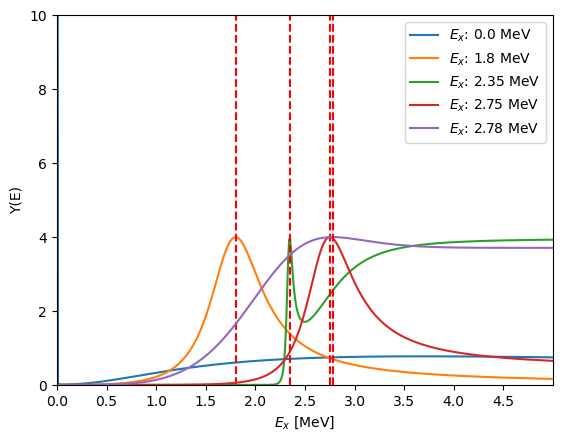

In [76]:
# Reference: https://www.osti.gov/servlets/purl/1281675
# https://www.nndc.bnl.gov/nudat3/getdataset.jsp?nucleus=9B&unc=NDS
# https://pure-oai.bham.ac.uk/ws/files/27169423/prc_wheldon_spectroscopy_of_b9_via_high_resolution_ejectile_tagged_recoil_breakup_2015.pdf

from mpmath import *
import numpy as np
import matplotlib.pyplot as plt

def F(l, eta, z):
    out = []
    try: #numpy array
        for n in range(len(eta)):
            out.append(coulombf(l,eta[n],z[n]))
        return np.array(out)
    except: #Single val
        return coulombf(l,eta,z)
def G(l, eta, z):
    out = []
    try:
        for n in range(len(eta)):
            out.append(coulombg(l,eta[n],z[n]))
        return np.array(out)
    except: #Single val
        return coulombg(l,eta,z)

def Pl(l, eta, z):
    return z/(F(l,eta,z)**2+G(l,eta,z)**2) #Penetrability = ka/(F^2+G^2)

#Constants
hbar = 197 #MeV/fm
e2 = 1.6e-19**2
amu = 931.5 #MeV/c2
alpha = 1./137.
Ex_ = np.linspace(0.0,5.0,501) #MeV

########## 8Be+p (0+ and 1/2+)
#Inputs
M1 = 8 #in amu
M2 = 1 #in amu
a = 1.4*(M1**(1/3)+M2**(1/3)) #fm
Z1 = 4 #in units of e
Z2 = 1 #in units of e
mu = (M1*M2)/(M1+M2)

#State
Q = +0.1859
l = [1,0,3,2,1] #3/2- g.s, 1/2+, sharp alpha 5/2-, 5/2+, broad 1/2-
Ex = [0,1.8,2.345,2.75,2.78] #MeV, Ex
Gamma = [0.54e-3,0.650,0.081*0.01,0.614,3.13*0.9] #MeV
I = [10,1,1,1,1] #Intensities
Ex=np.array(Ex)
#
widthp = []
for n in range(len(Ex)): #loop in states
    if(Ex[n]+Q)>0:
        k_res = np.sqrt((2*mu*amu*(Ex[n]+Q)))/hbar #fm^-1
        eta_res = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*(Ex[n]+Q)))
        z_res = k_res*a
    else:
        print(f"Below threshold: {Ex[n]+Q}")
        widthp.append(np.zeros_like(Ex_))
        continue
    width = []
    for ene in Ex_:
        ene += Q
        if(ene<0):
            width.append(0)
            continue
        else:
            k = np.sqrt((2*mu*amu*ene))/hbar #fm^-1
            eta = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*ene))
            z = k*a
            g2 = Gamma[n]/(2*Pl(l[n],eta_res,z_res)) #reduced width at pole (ignoring shifts for now)
            width.append(2*Pl(l[n],eta,z)*g2)#Gamma=2*Pl(E)*g2
    widthp.append(width)
    
##### 5Li+a (3/2- and 0+)

#Inputs
M1 = 5 #in amu
M2 = 4 #in amu
a = 1.4*(M1**(1/3)+M2**(1/3)) #fm
Z1 = 3 #in units of e
Z2 = 2 #in units of e
mu = (M1*M2)/(M1+M2)

#State
Q = -1.689
l = [0,1,2,1,2] #3/2- g.s, 1/2+, sharp alpha 5/2-, 5/2+, broad 1/2-
Ex = [0,1.8,2.345,2.75,2.78] #MeV, Ex
Gamma = [0.0,0.0,0.081,0.614*0.01,3.13*0.1] #MeV
I = [10,1,1,1,1] #Intensities
Ex=np.array(Ex)
#
widtha = []
for n in range(len(Ex)): #loop in states
    if(Ex[n]+Q)>0:
        k_res = np.sqrt((2*mu*amu*(Ex[n]+Q)))/hbar #fm^-1
        eta_res = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*(Ex[n]+Q)))
        z_res = k_res*a
    else:
        print(f"Below threshold: {Ex[n]+Q}")
        widtha.append(np.zeros_like(Ex_))
        continue
    width = []
    for ene in Ex_:
        ene += Q
        if(ene<0):
            width.append(0)
            continue
        else:
            k = np.sqrt((2*mu*amu*ene))/hbar #fm^-1
            eta = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*ene))
            z = k*a
            g2 = Gamma[n]/(2*Pl(l[n],eta_res,z_res)) #reduced width at pole (ignoring shifts for now)
            width.append(2*Pl(l[n],eta,z)*g2)#Gamma=2*Pl(E)*g2
    widtha.append(width)
    
widtha=np.array(widtha)  
widthp=np.array(widthp)

for n in range(len(Ex)): #loop in states
    widtht = widtha[n] + widthp[n]
    lineshape = I[n]*widtht**2/((Ex_-Ex[n])**2+widtht**2*0.25)
    plt.plot(Ex_,lineshape,label=f"$E_x$: {Ex[n]:.3} MeV")
    #plt.yscale('log')
    plt.xlabel("$E_{x}$ [MeV]")
    plt.ylabel("Y(E)")
    plt.axvline(x=Ex[n],c="red",ls="--")
plt.xticks(np.arange(0.0,5,step=0.5))
plt.xlim(0.0,5)
plt.ylim(0,10)
#plt.yscale('log')
plt.legend()
plt.show()